# Chronic Illness Triggers Linear Regression

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Defining the path and loading data

In [20]:
path = r'C:\Users\tiffk\Chronic_Illness'

In [22]:
# Importing datasets
df_merged = pd.read_csv(os.path.join(path, 'Data', 'merged_data.csv'), low_memory=False, index_col = False)


**Checking data**

## 

In [26]:
df_merged.head(5)

,Unnamed: 0.1,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,pain_count,symptom,condition,weather,precipitation_x,severity,Age_1,precipitation_y_checked2
0,0,0,9070,0,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0,0,0,NaN,Ulcerative colitis,NaN,0,0,34.04953,NaN
1,1,1,22737,32,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0,0,0,NaN,Ulcerative colitis,NaN,0,0,32.00000,NaN
2,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031
3,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031
4,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,1,Joint stiffness,pain in left upper arm felt like i was getting...,NaN,0,4,2.00000,0.0031


In [28]:
df_merged.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729479 entries, 0 to 3729478
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0.1              int64  
 1   Unnamed: 0                int64  
 2   user_id                   int64  
 3   age                       int64  
 4   sex                       object 
 5   country                   object 
 6   checkin_date              object 
 7   trackable_id              object 
 8   trackable_type            object 
 9   trackable_name            object 
 10  trackable_value           object 
 11  has_arthritis             int64  
 12  pain_count                int64  
 13  symptom                   object 
 14  condition                 object 
 15  weather                   object 
 16  precipitation_x           int64  
 17  severity                  int64  
 18  Age_1                     float64
 19  precipitation_y_checked2  float64
dtypes: float64(2), int64(8),

In [30]:
# precipitation_x is a redundant column now
df_merged = df_merged.drop('precipitation_x', axis=1)

## Cleaning up column names and types, prepare the data for analysis

In [35]:
# Cleaning up column names and types
# Convert 'Age_1' column to integer type if it contains whole numbers, or to float type if it contains decimal numbers
df_merged['Age_1'] = df_merged['Age_1'].astype(int)  # Use int if 'Age_1' contains whole numbers, otherwise use float

# Rename the column 'precipitation_y_checked2' to 'precipitation'
df_merged = df_merged.rename(columns={'precipitation_y_checked2': 'precipitation'})

In [37]:
# Convert 'severity' column to the smallest integer type that can hold the values
df_merged['severity'] = pd.to_numeric(df_merged['severity'], downcast='integer')

# Convert 'Age_1' column to the smallest numeric type that can hold the values
df_merged['Age_1'] = pd.to_numeric(df_merged['Age_1'], downcast='integer')  # Use 'integer' if 'Age_1' contains whole numbers, otherwise use 'float'

# Convert 'precipitation' column to the smallest numeric type that can hold the values
df_merged['precipitation'] = pd.to_numeric(df_merged['precipitation'], downcast='float')

In [45]:
# Rename the column 'precipitation_y_checked2' to 'precipitation'
df_merged = df_merged.rename(columns={'Age_1': 'Age'})

**Export updated dataframe to save work**

In [167]:
df_merged.to_csv(os.path.join(path, 'Data', 'df_merged_cleaned.csv'))

In [169]:
df_merged.head()

,Unnamed: 0.1,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,...,condition,weather,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change
0,0,0,9070,0,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,...,Ulcerative colitis,NaN,0.0,34,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,22737,32,male,US,2015-11-26,1069,Condition,Ulcerative colitis,...,Ulcerative colitis,NaN,0.0,32,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
3,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
4,2,2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,...,pain in left upper arm felt like i was getting...,NaN,4.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0


In [132]:
# Add a new column 'humidity' based on conditions
df_merged['humidity'] = df_merged.loc[(df_merged['trackable_type'] == 'Weather') & (df_merged['trackable_name'] == 'humidity'), 'trackable_value']
df_merged['min_temp'] = df_merged.loc[(df_merged['trackable_type'] == 'Weather') & (df_merged['trackable_name'] == 'temperature_min'), 'trackable_value']
df_merged['max_temp'] = df_merged.loc[(df_merged['trackable_type'] == 'Weather') & (df_merged['trackable_name'] == 'temperature_max'), 'trackable_value']
df_merged['pressure'] = df_merged.loc[(df_merged['trackable_type'] == 'Weather') & (df_merged['trackable_name'] == 'pressure'), 'trackable_value']

In [130]:
weather_trackable_names = df_merged.loc[df_merged['trackable_type'] == 'Weather', 'trackable_name'].unique()
print(weather_trackable_names)

['icon' 'temperature_min' 'temperature_max' 'precip_intensity' 'pressure'
 'humidity']


In [144]:
# Identify numerical columns
numerical_columns = df_merged.select_dtypes(include=['int', 'float']).columns

# Convert numerical columns to the smallest appropriate data type
for col in numerical_columns:
    df_merged[col] = pd.to_numeric(df_merged[col], downcast='integer')

# You can also use downcast='float' for floating point columns

# Check the data types after conversion
print(df_merged.dtypes)

Unnamed: 0.1         int32
Unnamed: 0           int32
user_id              int32
age                   int8
sex                 object
country             object
checkin_date        object
trackable_id        object
trackable_type      object
trackable_name      object
trackable_value     object
has_arthritis         int8
pain_count            int8
symptom             object
condition           object
weather             object
severity             int32
Age                   int8
precipitation      float32
humidity            object
min_temp            object
max_temp            object
pressure            object
dtype: object


In [147]:
# Identify numerical columns
numerical_columns = df_merged.select_dtypes(include=['int', 'float']).columns

# Convert numerical columns to the smallest appropriate data type
for col in numerical_columns:
    df_merged[col] = pd.to_numeric(df_merged[col], downcast='float')


# Check the data types after conversion
print(df_merged.dtypes)

Unnamed: 0.1         int32
Unnamed: 0           int32
user_id              int32
age                   int8
sex                 object
country             object
checkin_date        object
trackable_id        object
trackable_type      object
trackable_name      object
trackable_value     object
has_arthritis         int8
pain_count            int8
symptom             object
condition           object
weather             object
severity           float32
Age                   int8
precipitation      float32
humidity            object
min_temp            object
max_temp            object
pressure            object
dtype: object


In [149]:
df_merged['humidity'] = pd.to_numeric(df_merged['humidity'], errors='coerce')
df_merged['min_temp'] = pd.to_numeric(df_merged['min_temp'], errors='coerce')
df_merged['max_temp'] = pd.to_numeric(df_merged['max_temp'], errors='coerce')
df_merged['pressure'] = pd.to_numeric(df_merged['pressure'], errors='coerce')

In [156]:
# Convert the columns to numeric
df_merged['humidity'] = pd.to_numeric(df_merged['humidity'], errors='coerce')
df_merged['min_temp'] = pd.to_numeric(df_merged['min_temp'], errors='coerce')
df_merged['max_temp'] = pd.to_numeric(df_merged['max_temp'], errors='coerce')
df_merged['pressure'] = pd.to_numeric(df_merged['pressure'], errors='coerce')

# Fill in missing values with the mean for each user_id and checkin_date
df_merged['humidity'] = df_merged.groupby(['user_id', 'checkin_date'])['humidity'].transform(lambda x: x.fillna(x.mean()))
df_merged['min_temp'] = df_merged.groupby(['user_id', 'checkin_date'])['min_temp'].transform(lambda x: x.fillna(x.mean()))
df_merged['max_temp'] = df_merged.groupby(['user_id', 'checkin_date'])['max_temp'].transform(lambda x: x.fillna(x.mean()))
df_merged['pressure'] = df_merged.groupby(['user_id', 'checkin_date'])['pressure'].transform(lambda x: x.fillna(x.mean()))

In [160]:
df_merged['temp_change'] = df_merged['max_temp'] - df_merged['min_temp']

In [173]:
df_merged.describe()

,user_id,age,has_arthritis,pain_count,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change
count,3.729479e+06,3.729479e+06,3.729479e+06,3.729479e+06,3.729479e+06,3.729479e+06,308302.000000,308446.000000,308446.000000,308446.000000,308446.000000,308446.000000
mean,2.163927e+04,3.327156e+01,1.560497e-01,1.228849e+00,1.012510e+02,3.558410e+01,0.002824,72.830343,44.043797,60.107633,1017.309523,16.063836
std,1.315659e+04,1.329557e+01,3.629025e-01,5.340560e-01,4.272639e+04,9.806479e+00,0.006228,11.931911,11.910604,13.854143,9.608423,6.300794
min,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,21.000000,-1.000000,14.000000,986.000000,3.000000
25%,1.034400e+04,2.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,2.800000e+01,0.000100,65.000000,39.000000,53.000000,1011.000000,12.000000
50%,2.387500e+04,3.300000e+01,0.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,0.001000,75.000000,43.000000,59.000000,1017.000000,15.000000
75%,3.233800e+04,4.200000e+01,0.000000e+00,2.000000e+00,3.000000e+00,4.200000e+01,0.002700,82.000000,49.000000,63.000000,1025.000000,20.000000
max,4.226700e+04,9.000000e+01,1.000000e+00,2.000000e+00,2.000200e+07,9.000000e+01,0.081200,96.000000,81.000000,97.000000,1040.000000,34.000000


In [171]:
df_merged = df_merged.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [192]:
pain_df = df_merged[df_merged['pain_count'] > 0]

In [212]:
pain_df.describe()

,user_id,age,has_arthritis,pain_count,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change
count,3.526710e+06,3.526710e+06,3.526710e+06,3.526710e+06,3.526710e+06,3.526710e+06,292438.000000,292582.000000,292582.000000,292582.000000,292582.000000,292582.000000
mean,2.144078e+04,3.360265e+01,1.639755e-01,1.299502e+00,1.083720e+02,3.564736e+01,0.002665,72.636902,43.668578,59.698532,1017.538796,16.029954
std,1.330017e+04,1.310856e+01,3.702534e-01,4.580400e-01,4.393749e+04,9.987887e+00,0.005760,11.917414,11.504830,13.541185,9.683798,6.325142
min,3.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000,21.000000,0.000000,14.000000,986.000000,3.000000
25%,9.994000e+03,2.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.800000e+01,0.000100,65.000000,39.000000,53.000000,1012.000000,12.000000
50%,2.285900e+04,3.300000e+01,0.000000e+00,1.000000e+00,2.000000e+00,3.400000e+01,0.001000,75.000000,43.000000,59.000000,1018.000000,15.000000
75%,3.339800e+04,4.300000e+01,0.000000e+00,2.000000e+00,4.000000e+00,4.300000e+01,0.002400,82.000000,48.000000,63.000000,1025.000000,20.000000
max,4.226700e+04,9.000000e+01,1.000000e+00,2.000000e+00,2.000200e+07,9.000000e+01,0.047500,94.000000,77.000000,96.000000,1040.000000,33.000000


In [206]:
df_merged['severity'] = df_merged['severity'] + df_merged['pain_count']

In [202]:
pain_df['severity'] = pain_df['severity'] + pain_df['pain_count']

C:\Users\tiffk\AppData\Local\Temp\ipykernel_23352\3948556098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pain_df['severity'] = pain_df['severity'] + pain_df['pain_count']


C:\Users\tiffk\AppData\Local\Temp\ipykernel_23352\2397968465.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['Age'], bins=25) # Shows extreme values
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

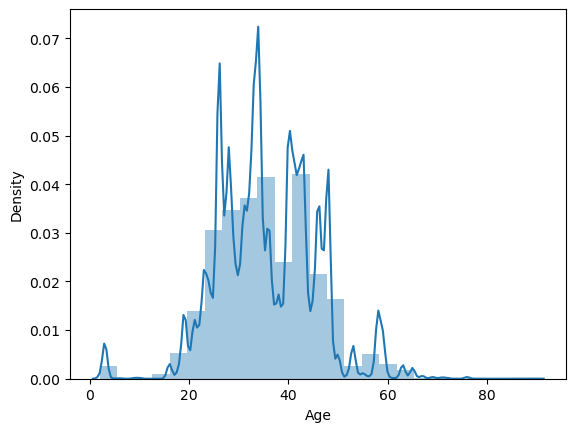

In [104]:
sns.distplot(df_merged['Age'], bins=25) # Shows extreme values

# Some of the outliers may need to be removed

C:\Users\tiffk\AppData\Local\Temp\ipykernel_23352\2669125851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['precipitation'], bins=25) # Shows extreme values
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='precipitation', ylabel='Density'>

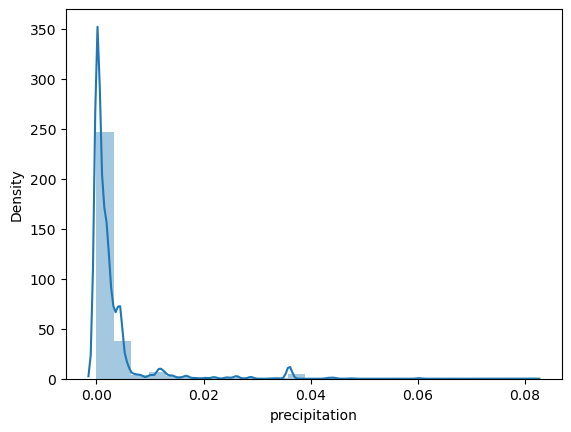

In [106]:
sns.distplot(df_merged['precipitation'], bins=25) # Shows extreme values

# Some of the outliers may need to be removed

## Explore the data visually with scatter plots

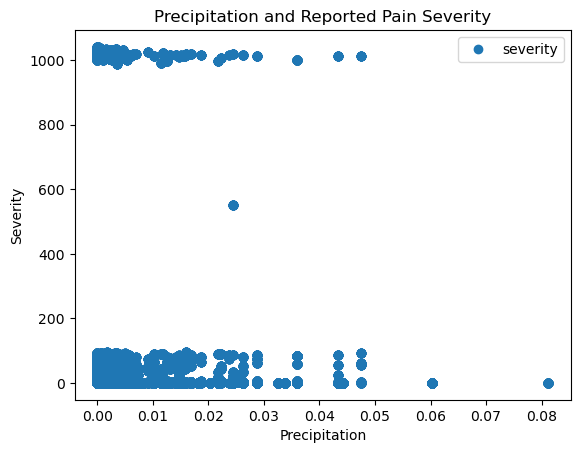

In [208]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_merged.plot(x = 'precipitation', y='severity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Precipitation and Reported Pain Severity')  
plt.xlabel('Precipitation')  
plt.ylabel('Severity')  
plt.show()

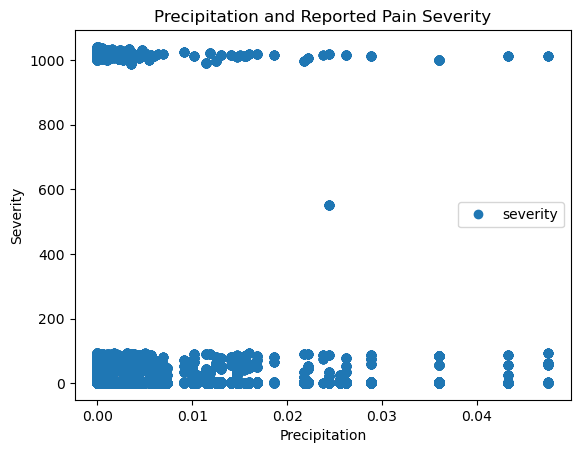

In [210]:
pain_df.plot(x = 'precipitation', y='severity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Precipitation and Reported Pain Severity')  
plt.xlabel('Precipitation')  
plt.ylabel('Severity')  
plt.show()

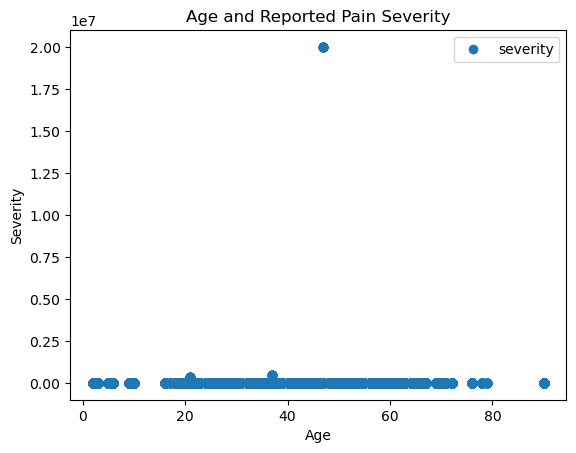

In [216]:
# Filter the data for values greater than 0 for Age and non-zero for severity
filtered_data = pain_df[(pain_df['Age'] > 0)]

# Create a scatterplot using matplotlib
filtered_data.plot(x='Age', y='severity', style='o')  # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age and Reported Pain Severity')  
plt.xlabel('Age')  
plt.ylabel('Severity')  
plt.show()

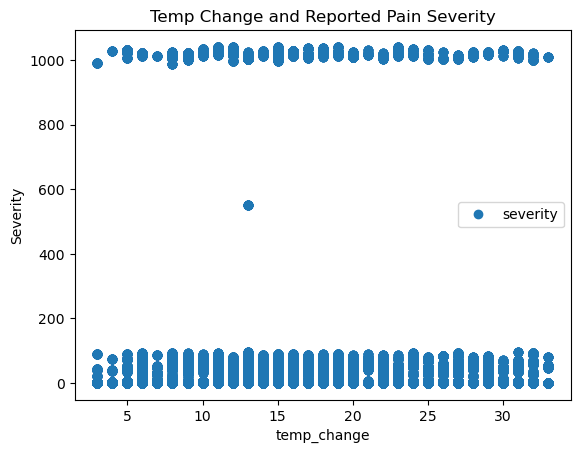

In [220]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
pain_df.plot(x = 'temp_change', y='severity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Temp Change and Reported Pain Severity')  
plt.xlabel('temp_change')  
plt.ylabel('Severity')  
plt.show()

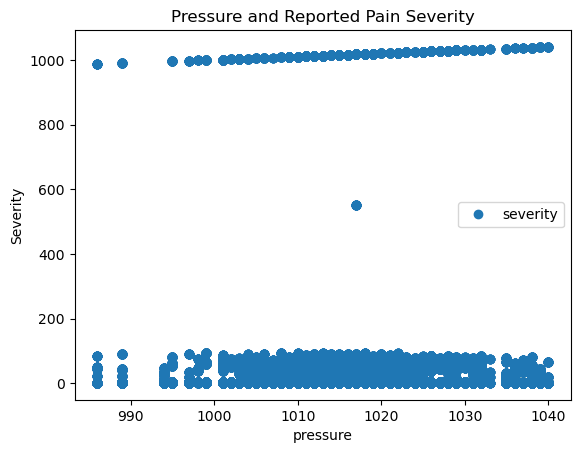

In [232]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
pain_df.plot(x = 'pressure', y='severity',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Pressure and Reported Pain Severity')  
plt.xlabel('pressure')  
plt.ylabel('Severity')  
plt.show()

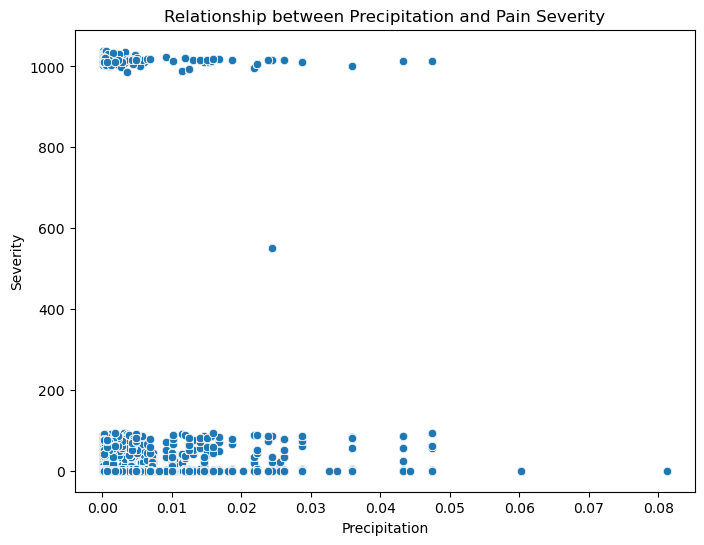

In [64]:
# Filter the DataFrame to include only rows where pain_count is not 0
condition_data = df_merged[df_merged['precipitation'] > 0]

# Create a scatter plot of 'precipitation' against 'pain_count' for the filtered data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='precipitation', y='severity', data=condition_data)
plt.xlabel('Precipitation')
plt.ylabel('Severity')
plt.title('Relationship between Precipitation and Pain Severity')
plt.show()

## Hypothesis

**A note about bias first: I know that we were advised that choosing something that we had a personal connection to would help motivate us and give us better insights into the analysis, but I am finding that my experiences are introducing bias into my efforts. Even if my experiences are anecdotal when taken alone, I am trying to extrapolate up to the gloable experiences of pain. To an extent I feel like I  KNOW there is a relationship hidden in here, but I am beginning to realize it must be more multivariate**

**I predict that a relationship exists between precipitation/humidity/pressure and reported pain.**

**After running through this I realize I am neglecting possible seasonal experiences and I can evaluate these by breaking the checkin_date values into months and years. Anecdotal evidence would say that colder months cause certain types of pain to increase.**

**The users in the data are  predominately female and that could be because females are more susceptible to symptoms or are more likely to pay attention to and report health issues. As a control of sorts I could find another self reported data source related to physical welbbeing but not pain to see if there is a more balanced gender distribution.**

**Spoiler alert**, none of the relationships analysed showed a strong predicatble pattern that could be sussed out with linear regression. I think multivariate analysis would be better for this data

## Reshape the data

In [70]:
# Define the independent variable (x) and the dependent variable (y)
X = df_merged['severity'].values.reshape(-1, 1)
y = df_merged['precipitation'].values.reshape(-1, 1)

## Split into training and test sets

In [74]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [77]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2610635, 1)
X_test shape: (1118844, 1)
y_train shape: (2610635, 1)
y_test shape: (1118844, 1)


## Run linear regression

In [82]:
# Initialize the linear regression model
regression = LinearRegression()

In [92]:
# Remove NaN values from y_train
import numpy as np
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Reshape the arrays to 2D
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict on the test data
y_pred = regression.predict(X_test)

## Visualize the results

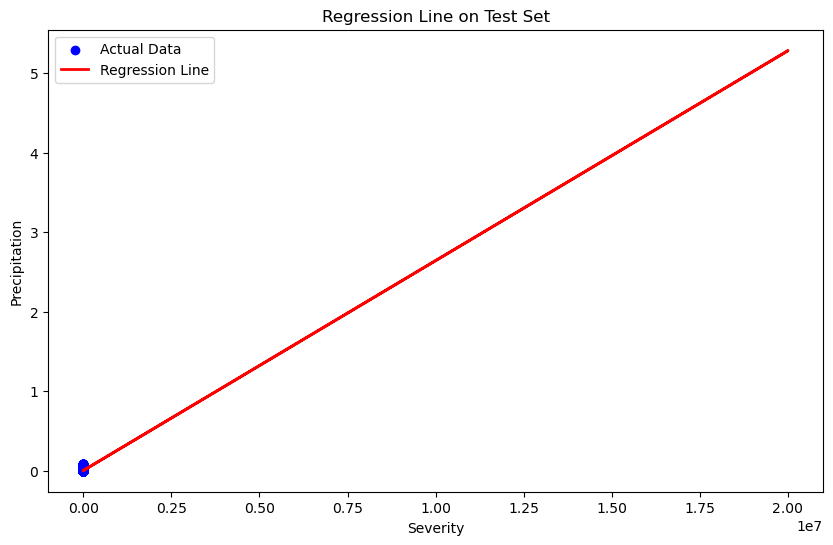

<Figure size 640x480 with 0 Axes>

In [100]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Severity')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Export to the "Visualizations" folder
file_name = os.path.join(path, 'Visuals', 'regression_line_test_setA.png')
plt.savefig(file_name)

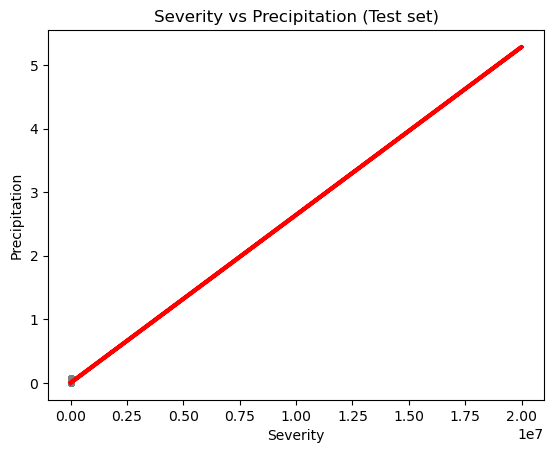

In [244]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Severity vs Precipitation (Test set)')
plot_test.xlabel('Severity')
plot_test.ylabel('Precipitation')
plot_test.show()

In [249]:
# to remove rows with NaN values
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with NaN values from y_test and y_pred
nan_indices = np.isnan(y_test) | np.isnan(y_pred)
y_test = y_test[~nan_indices]
y_pred = y_pred[~nan_indices]

# Calculate the model summary statistics
rmse = mean_squared_error(y_test, y_pred)  # This is the mean squared error
r2 = r2_score(y_test, y_pred)  # This is the R2 score.

In [252]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.64075245e-07]]
Mean squared error:  3.905203173621553e-05
R2 score:  0.00012437048269298145


In [258]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head(30)

,Actual,Predicted
0,0.0006,0.002818
1,0.0015,0.002818
2,0.0024,0.002817
3,0.0000,0.002818
4,0.0056,0.002820
5,0.0100,0.002829
6,0.0006,0.002818
7,0.0044,0.002817
8,0.0020,0.002818
9,0.0019,0.002818


In [261]:
# Predict.
y_pred_train = regression.predict(X_train) # This is predicting X_train!

In [264]:
rmse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

In [267]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.64075245e-07]]
Mean squared error:  3.871399894538564e-05
R2 score:  3.22743210430243e-05


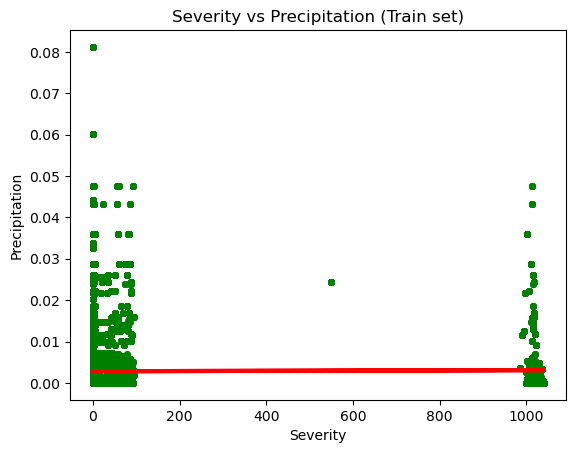

In [272]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_pred_train, color='red', linewidth =3)
plot_test.title('Severity vs Precipitation (Train set)')
plot_test.xlabel('Severity')
plot_test.ylabel('Precipitation')
plot_test.show()

## Trying the model with pressure and severity only for those that reported pain at all

### Reshape the data

In [278]:
# Define the independent variable (x) and the dependent variable (y)
X = pain_df['severity'].values.reshape(-1, 1)
y = pain_df['pressure'].values.reshape(-1, 1)

### Split into test and training

In [281]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [284]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2468697, 1)
X_test shape: (1058013, 1)
y_train shape: (2468697, 1)
y_test shape: (1058013, 1)


### Run linear regression

In [287]:
# Initialize the linear regression model
regression = LinearRegression()

In [289]:
# Remove NaN values from y_train
import numpy as np
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Reshape the arrays to 2D
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [291]:
# Predict on the test data
y_pred = regression.predict(X_test)

### Visualize the results

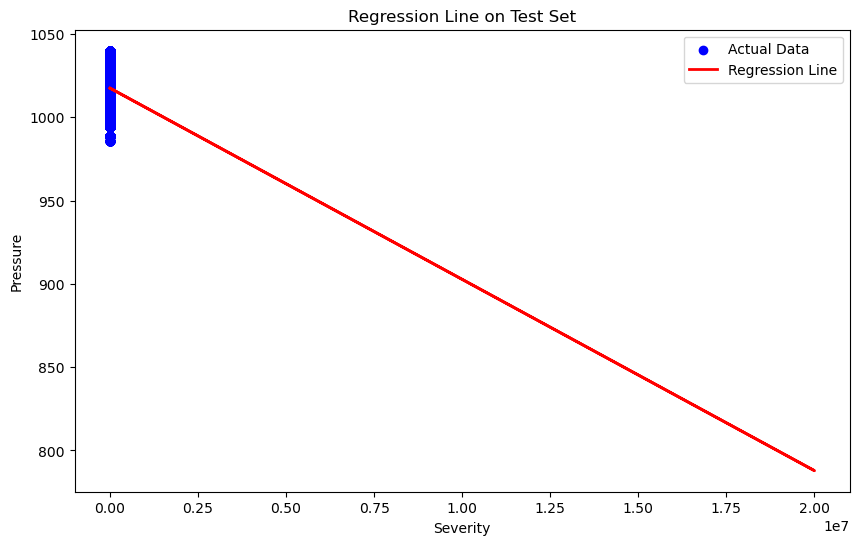

<Figure size 640x480 with 0 Axes>

In [294]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Severity')
plt.ylabel('Pressure')
plt.legend()
plt.show()

# Export to the "Visualizations" folder
file_name = os.path.join(path, 'Visuals', 'regression_line_test_setB.png')
plt.savefig(file_name)

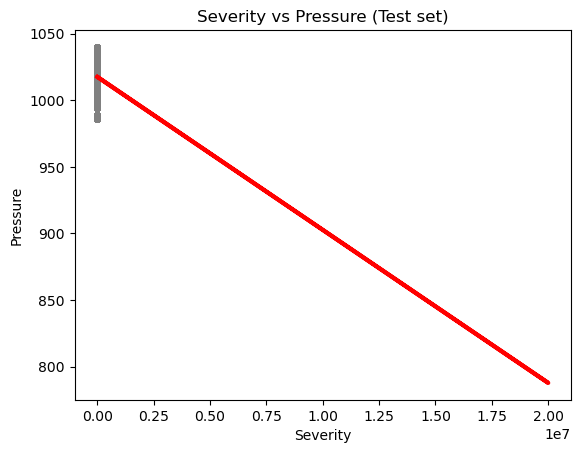

In [297]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Severity vs Pressure (Test set)')
plot_test.xlabel('Severity')
plot_test.ylabel('Pressure')
plot_test.show()

In [299]:
# to remove rows with NaN values
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with NaN values from y_test and y_pred
nan_indices = np.isnan(y_test) | np.isnan(y_pred)
y_test = y_test[~nan_indices]
y_pred = y_pred[~nan_indices]

# Calculate the model summary statistics
rmse = mean_squared_error(y_test, y_pred)  # This is the mean squared error
r2 = r2_score(y_test, y_pred)  # This is the R2 score.

In [301]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.1484512e-05]]
Mean squared error:  94.03834554679207
R2 score:  -3.2158173453034067e-06


In [303]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data.head(30)

,Actual,Predicted
0,1029.0,1017.536011
1,1022.0,1017.536072
2,1035.0,1017.536072
3,1013.0,1017.536011
4,1003.0,1017.536011
5,1016.0,1017.536072
6,1005.0,1017.535950
7,1010.0,1017.535278
8,1026.0,1017.536011
9,1038.0,1017.536072


In [305]:
# Predict.
y_pred_train = regression.predict(X_train) # This is predicting X_train!

In [307]:
rmse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

In [309]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.1484512e-05]]
Mean squared error:  93.66297991001332
R2 score:  -1.4934721392911854e-07


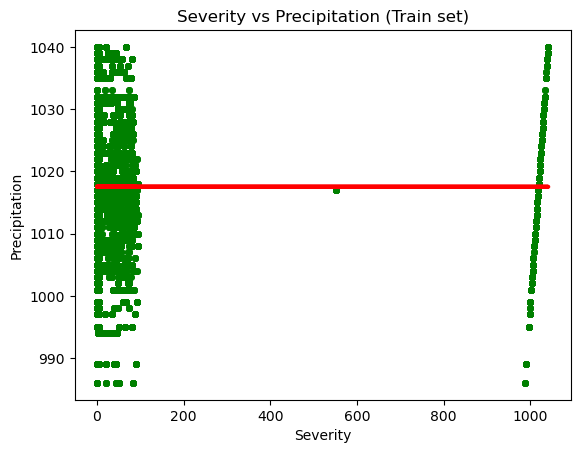

In [311]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_pred_train, color='red', linewidth =3)
plot_test.title('Severity vs Precipitation (Train set)')
plot_test.xlabel('Severity')
plot_test.ylabel('Precipitation')
plot_test.show()

## Examining whether having arthritis impacts the relationship

### Reshape

In [315]:
# Define the independent variable (x) and the dependent variable (y)
X = pain_df['has_arthritis'].values.reshape(-1, 1)
y = pain_df['severity'].values.reshape(-1, 1)

### Split into test and training

In [318]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [320]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2468697, 1)
X_test shape: (1058013, 1)
y_train shape: (2468697, 1)
y_test shape: (1058013, 1)


### Run linear regression

In [323]:
# Initialize the linear regression model
regression = LinearRegression()

In [327]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [329]:
# Predict on the test data
y_pred = regression.predict(X_test)

### Visualize the results

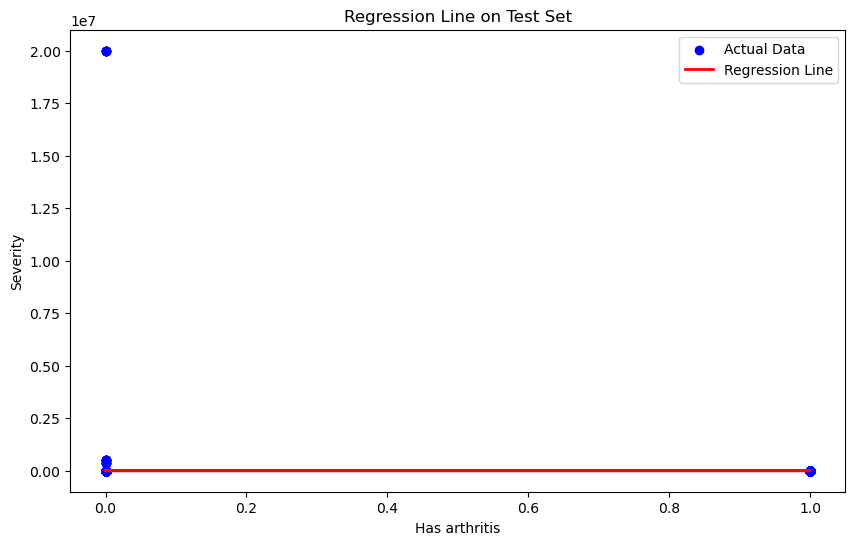

<Figure size 640x480 with 0 Axes>

In [332]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Has arthritis')
plt.ylabel('Severity')
plt.legend()
plt.show()

# Export to the "Visualizations" folder
file_name = os.path.join(path, 'Visuals', 'regression_line_test_setC.png')
plt.savefig(file_name)

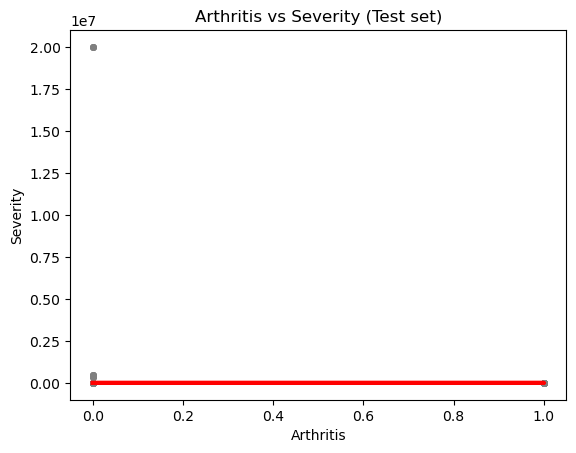

In [334]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Arthritis vs Severity (Test set)')
plot_test.xlabel('Arthritis')
plot_test.ylabel('Severity')
plot_test.show()

In [336]:
# Calculate the model summary statistics
rmse = mean_squared_error(y_test, y_pred)  # This is the mean squared error
r2 = r2_score(y_test, y_pred)  # This is the R2 score.

In [338]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-119.65315277]]
Mean squared error:  1892419744.3725197
R2 score:  9.22776741019149e-07


In [346]:
pain_df.head()

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,has_arthritis,...,condition,weather,severity,Age,precipitation,humidity,min_temp,max_temp,pressure,temp_change
2,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,pain in left upper arm felt like i was getting...,NaN,5.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
3,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,pain in left upper arm felt like i was getting...,NaN,5.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
4,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,pain in left upper arm felt like i was getting...,NaN,5.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
5,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,pain in left upper arm felt like i was getting...,NaN,5.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
6,376,2,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,0,...,pain in left upper arm felt like i was getting...,NaN,5.0,2,0.0031,66.0,54.0,69.0,1012.0,15.0
